In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For modeling and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [22]:
df = pd.read_csv('Social_Network_Ads.csv')

In [23]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [24]:
#Are there any null values in the dataset
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [25]:
#Are there any duplicated values in the dataset
df.duplicated().sum()

0

In [26]:
#drop unnecessary columns
df.drop(columns=['User ID'],inplace=True)

In [27]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


Gender
Female    204
Male      196
Name: count, dtype: int64

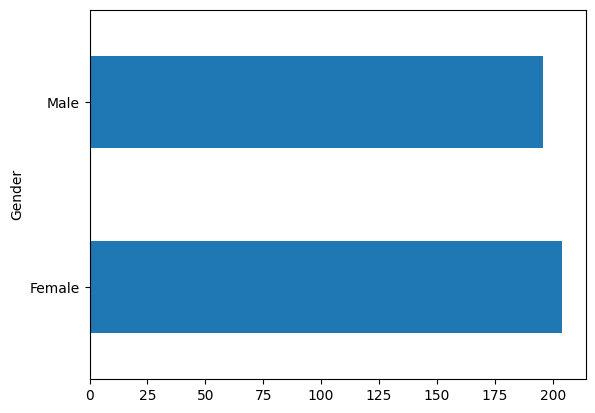

In [28]:
df.Gender.value_counts().plot(kind="barh");
df.Gender.value_counts()

**Number of females are greater than that of males but the difference is not big**

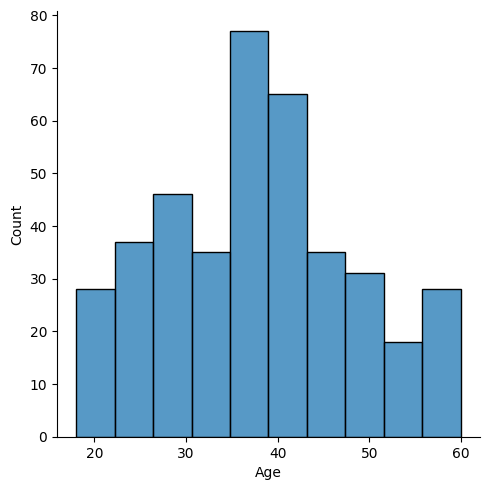

In [29]:
sns.displot(df.Age)

In [30]:
df.Age.describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

**Ages are normally distributed around 37**

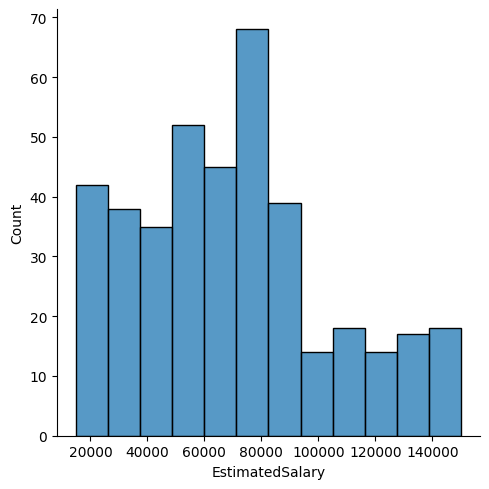

In [31]:
sns.displot(df.EstimatedSalary)

In [32]:
df.EstimatedSalary.describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

**it seems that the distribution is positvely skewed**

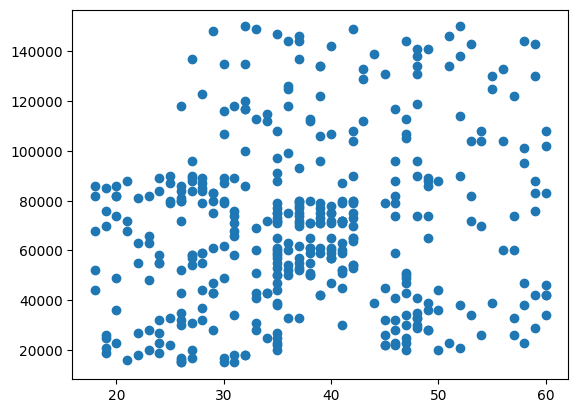

In [33]:
#finding the relation between estimated salary and Age in dataset
plt.scatter(df.Age, df.EstimatedSalary)

**There is no correlation between Age and Estimated salary**

<Axes: xlabel='Gender', ylabel='Age'>

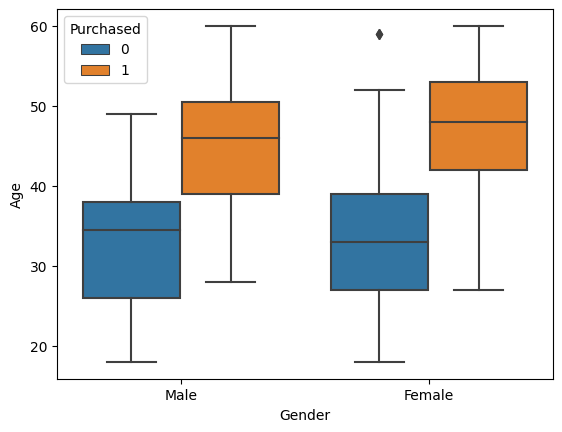

In [34]:
sns.boxplot(y='Age', x='Gender',data=df,hue='Purchased')

**Older people(Males and Females) are more probable to purchase than younger people**

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

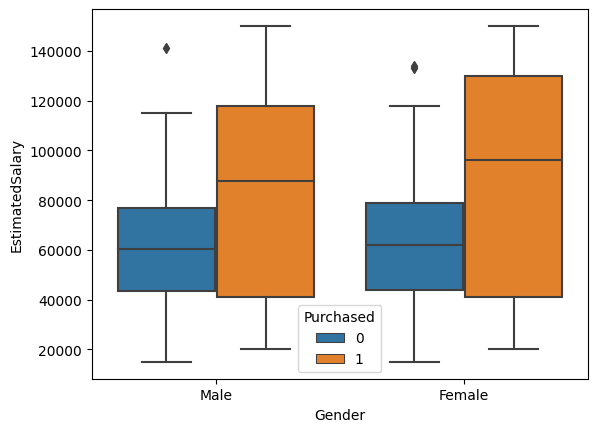

In [35]:
sns.boxplot(y='EstimatedSalary', x='Gender',data=df,hue='Purchased')

**EstimatedSalary Mean and median of females are greater than men and people with high salary most probable to purchase**

# Modeling

In [36]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [37]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

#### Encoding Categorical Variables


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

#### Spliting data into training and testing



In [39]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Feature Scaling



<Axes: xlabel='Age', ylabel='Density'>

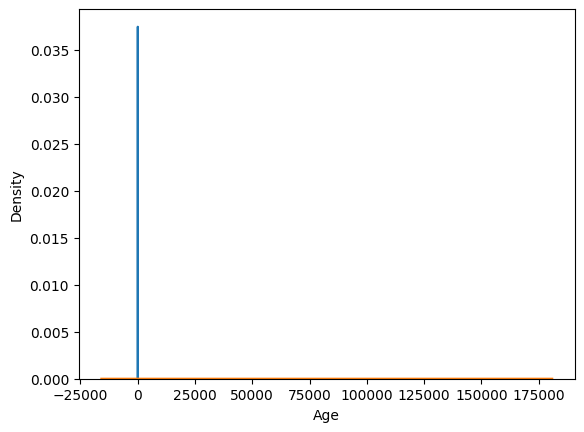

In [40]:
sns.kdeplot(df['Age'])
sns.kdeplot(df['EstimatedSalary'])

**we can see here there is a big difference between the values. we need to scale this data.**

In [41]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

#### Training the Logistic Regression model on the Training set

In [42]:
knn_model = KNeighborsClassifier()

In [43]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
y_pred = knn_model.predict(X_test)

In [45]:
#training score
knn_model.score(X_train, y_train)

0.9066666666666666

In [46]:
#testing score
knn_model.score(X_test, y_test)

0.92

In [47]:
#overall accuracy score
accuracy_score(y_test, y_pred)

0.92